In [5]:
import os, sys, getopt, cv2, shutil, PickleUtil, math

print(round(10.000013231, 6))

10.000013


## Parameters

In [2]:
video = "colonoscopy_key_frames_video3.mp4"
mask = "erda.png"

inputvideo = "Videos/" + video
outputframes = "Frames/" + video.replace(".mp4", "")
maskfile = "Masks/" + mask
outputfeatures = "Features/" + video.replace(".mp4", "")

## Processing video

In [3]:
from ProcessVideo import Video2Frames
Video2Frames(inputvideo, outputframes)

Processing 0%
Processing 5.0%
Processing 10.0%
Processing 15.0%
Processing 20.0%
Processing 25.0%
Processing 30.0%
Processing 35.0%
Processing 40.0%
Processing 45.0%
Processing 50.0%
Processing 55.00000000000001%
Processing 60.0%
Processing 65.0%
Processing 70.0%
Processing 75.0%
Processing 80.0%
Processing 85.0%
Processing 90.0%
Processing 95.0%
Could not read the image frame at 364 index
Processing 100.0%


## Processing frames (keyfeatures & matching)

In [3]:
from ProcessFrames import Frames2Features
Frames2Features(outputframes, outputfeatures, 250, "frame{:0>5}.jpg")

Processing frames 0%


KeyboardInterrupt: 

In [10]:
img = cv2.imread("Frames/colonoscopy_key_frames_video3/frame00000.jpg")
mask = cv2.imread("Masks/erda.png")
cv2.imshow('SIFT Keypoints', img)
masked_img = cv2.bitwise_and(img, img, mask=mask)
cv2.imshow('SIFT Keypoints', img)

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\arithm.cpp:230: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'cv::binary_op'


<IPython.core.display.Javascript object>


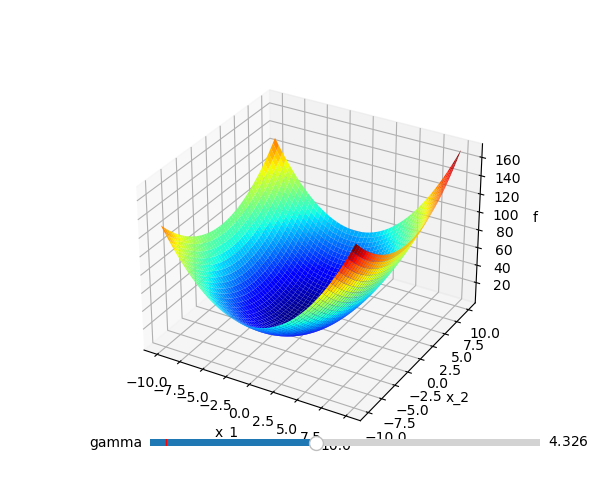

In [7]:
# -*- coding: utf-8 -*-
"""
Spyder Editor

This is a temporary script file.
"""
import numpy as np

def f(x_1,x_2,gamma):
    return (x_1 + 1)**2 + gamma*x_2**2

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.widgets import Slider, Button
%matplotlib notebook
x_1s = np.linspace(-10,10,50)
x_2s = np.linspace(-10,10,50)

x_1s_2d, x_2s_2d = np.meshgrid(x_1s,x_2s)

# 3D Projection

fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection='3d')

# Surface Plot

ax.plot_surface(x_1s_2d, x_2s_2d, f(x_1s_2d, x_2s_2d, 0.5), cmap=cm.jet, lw=2)

# Labels

ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('f')

# Make a horizontal slider to control the frequency.
axgamma = fig.add_axes([0.25, 0.1, 0.65, 0.03])
gamma_slider = Slider(
    ax=axgamma,
    label='gamma',
    valmin=0.1,
    valmax=10,
    valinit=0.5,
)

# The function to be called anytime a slider's value changes
def update(val):
    line.set_ydata(f(x_1s_2d, x_2s_2d, gamma_slider.val))
    fig.canvas.draw_idle()


# register the update function with each slider
gamma_slider.on_changed(update)

# Display

plt.show()